Rephrase as part of a project done through schooling to increase accuracy/refine it further. This was my effort towards achieving (ReadMe)

In [1]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


2024-11-12 17:20:16.799057: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-12 17:20:16.802249: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-12 17:20:16.811562: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 17:20:16.826986: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-12 17:20:16.831042: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 17:20:16.842296: I tensorflow/core/platform/cpu_feature_gu

### Import Data

In [ ]:
import pandas as pd

aquifier_df = pd.read_csv('/workspaces/time-series-project-tutorial/acea-water-prediction/Aquifer_Auser.csv')
aquifier_df.head()

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.2,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
aquifier_df.isnull().sum()
aquifier_df = aquifier_df.dropna()
print(aquifier_df)

            Date  Rainfall_Gallicano  Rainfall_Pontetetto  \
4821  17/05/2011                 0.0                  0.0   
4822  18/05/2011                 0.0                  0.0   
4823  19/05/2011                 0.0                  0.0   
4824  20/05/2011                 0.8                  0.0   
4825  21/05/2011                 0.0                  0.0   
...          ...                 ...                  ...   
8149  26/06/2020                 0.0                  0.0   
8150  27/06/2020                 0.0                  0.0   
8151  28/06/2020                 0.0                  0.0   
8152  29/06/2020                 0.0                  0.0   
8153  30/06/2020                 0.0                  0.0   

      Rainfall_Monte_Serra  Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  \
4821                   0.0                0.0                       0.0   
4822                   0.0                0.0                       0.0   
4823                   0.0                

### Format Time Series Date Field

In [4]:
from datetime import datetime

original_date = aquifier_df['Date']
parsed_date = original_date.apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))

# Format to mm/dd/yyyy
aquifier_df['formatted_date'] = pd.to_datetime(aquifier_df['Date'], format="%d/%m/%Y").dt.strftime("%m/%d/%Y")

print(aquifier_df['formatted_date'])


4821    05/17/2011
4822    05/18/2011
4823    05/19/2011
4824    05/20/2011
4825    05/21/2011
           ...    
8149    06/26/2020
8150    06/27/2020
8151    06/28/2020
8152    06/29/2020
8153    06/30/2020
Name: formatted_date, Length: 2086, dtype: object


In [5]:
aquifier_df = aquifier_df.set_index('formatted_date')
aquifier_df = aquifier_df.drop(columns=['Date'])
aquifier_df.head()

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
formatted_date,,,,,,,,,,,,,,,,,,,,,
05/17/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.80,17.20,17.45,-9936.0,-16377.12,-12823.488,0.0,0.0,0.17,-1.04
05/18/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.25,19.00,19.00,-9936.0,-16377.12,-12823.488,0.0,0.0,0.18,-1.04
05/19/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.35,19.95,20.10,-9936.0,-16377.12,-12823.488,0.0,0.0,0.16,-1.04
05/20/2011,0.8,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.6,0.4,...,16.40,20.15,21.60,-9936.0,-16377.12,-12823.488,0.0,0.0,0.15,-1.04
05/21/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,17.60,21.35,21.15,-9936.0,-16377.12,-12823.488,0.0,0.0,0.15,-1.05


In [6]:
aquifier_df.columns

Index(['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
       'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
       'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')

## Multivariate Analysis - LSTM 

### Min Max Scaling

#### Function to Min Max scale multiple features

In [7]:
target_columns = aquifier_df[['Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_LT2']].columns.tolist()
feature_columns = aquifier_df.drop(columns=target_columns).columns.tolist()

#target_columns.dtypes

In [8]:
# Ensure X is defined

def prepare_multi_feature_data(df, feature_columns, target_columns, lookback=30):
    """
    Prepare multi-feature sequences for LSTM model
    """
    
    X, y = [], []
    # Scale the features
    scaler_features = MinMaxScaler()
    scaled_features = scaler_features.fit_transform(df[feature_columns])
    
    # Scale the target separately
    scaler_target = MinMaxScaler()
    scaled_target = scaler_target.fit_transform(df[target_columns])
    
    for i in range(len(df) - lookback):
        # Features: take all feature columns for the lookback period
        X.append(scaled_features[i:(i + lookback)])
        # Targets: take all target columns for the prediction point
        y.append(scaled_target[(i + lookback)])
    
    return X, y, scaler_features, scaler_target

# Call the function with debugging
try:
    X, y, scaler_features, scaler_target = prepare_multi_feature_data(aquifier_df, feature_columns, target_columns, lookback=30)
    print(scaler_target)
except ValueError as e:
    print("ValueError encountered:", e)
    # print("aquifier_df shape:", aquifier_df.shape)
    # print("feature_columns:", feature_columns)
    # print("target_columns:", target_columns)
    # print("lookback:", 7)





MinMaxScaler()


#### Define Test Train Split Myself <br>

In [9]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
test_size = len(X) - train_size
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
#print(y_train)


Train size: 1644, Test size: 412


### LSTM Model Multi-Target

In [10]:
from tensorflow.keras.layers import Bidirectional

n_features = len(feature_columns)

model = Sequential([
    # Increase capacity for better pattern recognition
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(30, n_features))),
    Dropout(0.3),
    
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dense(3)
])

# Use Huber loss to handle outliers better
model.compile(optimizer=Adam(learning_rate=0.0005), loss='huber')

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
import numpy as np

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

# Ensure the shapes are compatible
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,#increase to 64 
    validation_split=0.1,
    verbose=1
)

X_train shape: (1644, 30, 23)
y_train shape: (1644, 3)
Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - loss: 0.0083 - val_loss: 4.0474e-04
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - loss: 0.0015 - val_loss: 5.9645e-04
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.0012 - val_loss: 6.9966e-04
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0010 - val_loss: 2.8550e-04
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 9.9764e-04 - val_loss: 4.9880e-04
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 8.4700e-04 - val_loss: 2.6773e-04
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 8.0657e-04 - val_loss: 1.9396e-04
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 7.0583e-04 - val_loss: 2.0975e-04
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 6.8035e-04 - val_loss: 1.9719e-04
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 6.1198e-04 - val_loss: 3.3170e-04
Epoch 11/20
47/47 ━━━━

### Model Predictions
We train the model on the train data and the test data to see how well <br>
we are predicting the training and testing data

In [12]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(test_pred)

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.144007   0.39844412 0.09144357]
 [0.14355478 0.39920682 0.09188914]
 [0.14229764 0.39902726 0.09214812]
 ...
 [0.15590398 0.34830266 0.10552102]
 [0.15264794 0.3450211  0.10540649]
 [0.1503023  0.34284532 0.10477217]]


### Convert back to normal scale

In [13]:
# Inverse transform predictions
train_pred = scaler_target.inverse_transform(train_pred)
test_pred = scaler_target.inverse_transform(test_pred)
y_train_orig = scaler_target.inverse_transform(y_train)
y_test_orig = scaler_target.inverse_transform(y_test)



### Evaluate Loss

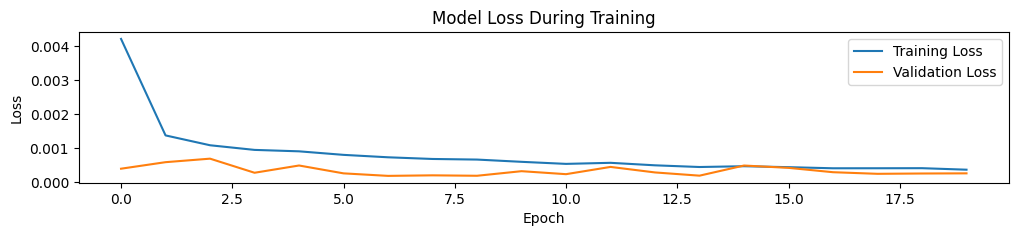

In [14]:
import matplotlib.pyplot as plt


# Create visualizations
plt.figure(figsize=(12, 9))

# Plot 1: Training Loss
plt.subplot(4, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

## Evaluate Progress

In [15]:
def evaluate_regression_lstm(y_true, y_pred):
    # R² score (1.0 is perfect prediction)
    r2 = r2_score(y_true, y_pred)
    
    # Mean Absolute Error
    mae = mean_absolute_error(y_true, y_pred)
    
    # Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # Custom accuracy metric for regression (as percentage)
    # Using 1 - normalized MAE as a proxy for accuracy
    #accuracy = (1 - mae / (y_true.max() - y_true.min())) * 100
    
    print("\nRegression Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    #print(f"Accuracy (based on normalized MAE): {accuracy:.2f}%")
    
    return r2, mae, rmse

### Evaluate 3 Targets

In [16]:
evaluate_regression_lstm(y_test_orig[0], test_pred[0])


Regression Metrics:
R² Score: 0.9933
MAE: 0.2195
RMSE: 0.2748


(0.9933168559991812, 0.2194882965087889, 0.2748051920030445)

In [17]:
evaluate_regression_lstm(y_test_orig[1], test_pred[1])


Regression Metrics:
R² Score: 0.9947
MAE: 0.2083
RMSE: 0.2458


(0.9947197333501501, 0.2083135223388671, 0.24578614018162145)

In [18]:
evaluate_regression_lstm(y_test_orig[2], test_pred[2])


Regression Metrics:
R² Score: 0.9967
MAE: 0.1616
RMSE: 0.1937


(0.9967027922313123, 0.1616434351603194, 0.19369595043721607)

## Find Optimal Learning Rate 

In [19]:
# def find_optimal_lr(model, X_train, y_train):
#     lr_schedule = np.logspace(-4, -2, 100)  # Test from 0.0001 to 0.01
#     losses = []
    
#     for lr in lr_schedule:
#         model.optimizer.learning_rate.assign(lr)
#         loss = model.train_on_batch(X_train[:32], y_train[:32])
#         losses.append(loss)
        
#     best_lr = lr_schedule[np.argmin(losses)]
#     return best_lr

# find_optimal_lr(model, X_train, y_train)

## Plot Residuals - Actual vs Predicted

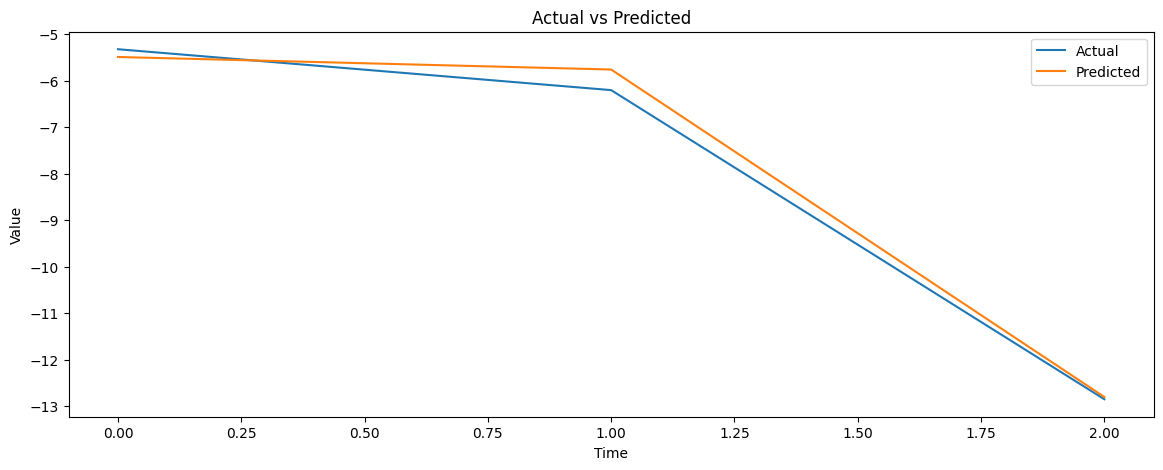

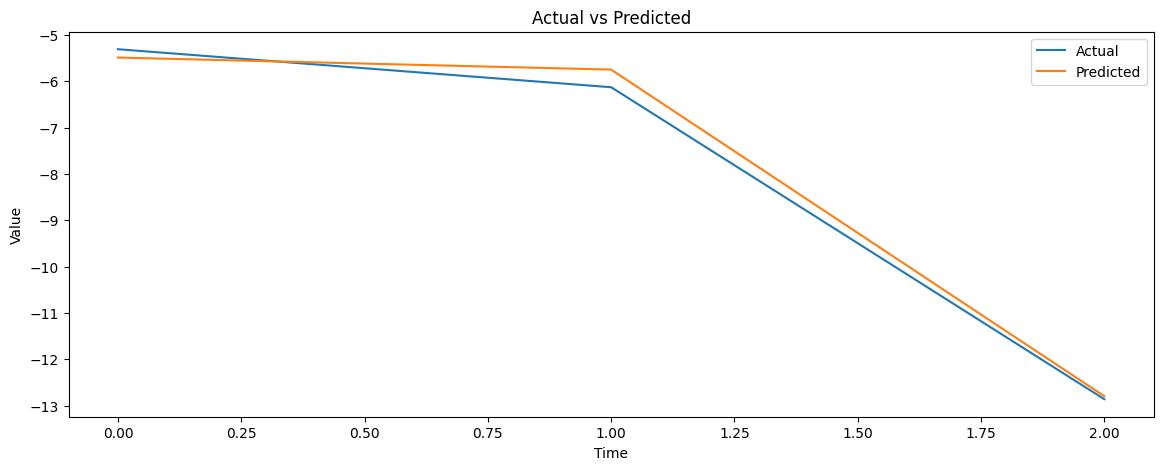

In [20]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_true, y_pred, title='Actual vs Predicted'):
    plt.figure(figsize=(14, 5))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Assuming y_test and test_pred are defined
plot_actual_vs_predicted(y_test_orig[0], test_pred[0])
plot_actual_vs_predicted(y_test_orig[1], test_pred[1])

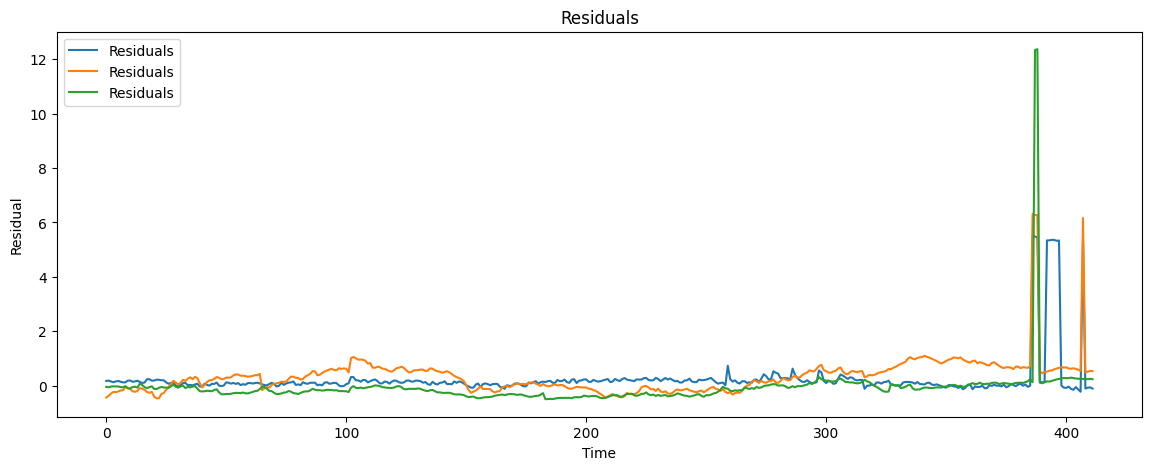

In [21]:
def plot_residuals(y_true, y_pred, title='Residuals'):
    residuals = y_true - y_pred
    plt.figure(figsize=(14, 5))
    plt.plot(residuals, label='Residuals')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Residual')
    plt.legend()
    plt.show()
    
    
plot_residuals(y_test_orig, test_pred, title='Residuals')